In [ ]:
!pip install impyute

In [ ]:
# import all the required libraries
import re

import pandas as pd
import numpy as np

from impyute.imputation.cs import mice
from imblearn.over_sampling import SMOTE 
from imblearn.ensemble import BalancedRandomForestClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout


from google.colab import data_table
data_table.enable_dataframe_formatter()

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# get the column names from the website
column_name_string = 'X1 net profit / total assets X2 total liabilities / total assets X3 working capital / total assets X4 current assets / short-term liabilities X5 [(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365 X6 retained earnings / total assets X7 EBIT / total assets X8 book value of equity / total liabilities X9 sales / total assets X10 equity / total assets X11 (gross profit + extraordinary items + financial expenses) / total assets X12 gross profit / short-term liabilities X13 (gross profit + depreciation) / sales X14 (gross profit + interest) / total assets X15 (total liabilities * 365) / (gross profit + depreciation) X16 (gross profit + depreciation) / total liabilities X17 total assets / total liabilities X18 gross profit / total assets X19 gross profit / sales X20 (inventory * 365) / sales X21 sales (n) / sales (n-1) X22 profit on operating activities / total assets X23 net profit / sales X24 gross profit (in 3 years) / total assets X25 (equity - share capital) / total assets X26 (net profit + depreciation) / total liabilities X27 profit on operating activities / financial expenses X28 working capital / fixed assets X29 logarithm of total assets X30 (total liabilities - cash) / sales X31 (gross profit + interest) / sales X32 (current liabilities * 365) / cost of products sold X33 operating expenses / short-term liabilities X34 operating expenses / total liabilities X35 profit on sales / total assets X36 total sales / total assets X37 (current assets - inventories) / long-term liabilities X38 constant capital / total assets X39 profit on sales / sales X40 (current assets - inventory - receivables) / short-term liabilities X41 total liabilities / ((profit on operating activities + depreciation) * (12/365)) X42 profit on operating activities / sales X43 rotation receivables + inventory turnover in days X44 (receivables * 365) / sales X45 net profit / inventory X46 (current assets - inventory) / short-term liabilities X47 (inventory * 365) / cost of products sold X48 EBITDA (profit on operating activities - depreciation) / total assets X49 EBITDA (profit on operating activities - depreciation) / sales X50 current assets / total liabilities X51 short-term liabilities / total assets X52 (short-term liabilities * 365) / cost of products sold) X53 equity / fixed assets X54 constant capital / fixed assets X55 working capital X56 (sales - cost of products sold) / sales X57 (current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation) X58 total costs /total sales X59 long-term liabilities / equity X60 sales / inventory X61 sales / receivables X62 (short-term liabilities *365) / sales X63 sales / short-term liabilities X64 sales / fixed assets'
column_names = re.sub(r'X[0-9]+', " ", column_name_string)
column_names_list = column_names.split("   ")
column_names_list.append("Bankruptcy")
print(f'The number of features is {len(column_names_list)}')
print(column_names_list)

The number of features is 65
['  net profit / total assets', 'total liabilities / total assets', 'working capital / total assets', 'current assets / short-term liabilities', '[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365', 'retained earnings / total assets', 'EBIT / total assets', 'book value of equity / total liabilities', 'sales / total assets', 'equity / total assets', '(gross profit + extraordinary items + financial expenses) / total assets', 'gross profit / short-term liabilities', '(gross profit + depreciation) / sales', '(gross profit + interest) / total assets', '(total liabilities * 365) / (gross profit + depreciation)', '(gross profit + depreciation) / total liabilities', 'total assets / total liabilities', 'gross profit / total assets', 'gross profit / sales', '(inventory * 365) / sales', 'sales (n) / sales (n-1)', 'profit on operating activities / total assets', 'net profit / sales', 'gross profit (in 3 y

In [ ]:
# load the dataset into a dataframe
df = pd.read_csv('/content/1year.csv', names = column_names_list)

In [ ]:
df

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,...,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets,Bankruptcy
0,0.200550,0.37951,0.39641,2.04720,32.3510,0.388250,0.249760,1.330500,1.13890,0.504940,...,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770,0
1,0.209120,0.49988,0.47225,1.94470,14.7860,0.000000,0.258340,0.996010,1.69960,0.497880,...,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.98700,0
2,0.248660,0.69592,0.26713,1.55480,-1.1523,0.000000,0.309060,0.436950,1.30900,0.304080,...,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.20780,0
3,0.081483,0.30734,0.45879,2.49280,51.9520,0.149880,0.092704,1.866100,1.05710,0.573530,...,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.54970,0
4,0.187320,0.61323,0.22960,1.40630,-7.3128,0.187320,0.187320,0.630700,1.15590,0.386770,...,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.89800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7022,0.018371,0.47410,-0.13619,0.60839,-18.4490,0.018371,0.018371,0.972030,1.01210,0.460840,...,0.011909,0.039866,0.98809,0.274140,73.5050,79.2370,31.268,11.6730,5.14890,1
7023,-0.013359,0.58354,-0.02265,0.92896,-42.2320,-0.013359,-0.015036,0.562890,0.98904,0.328470,...,-0.011082,-0.040671,1.01110,0.805920,10.5990,7.1740,94.092,3.8792,1.75720,1
7024,0.006338,0.50276,0.43923,1.87360,9.7417,0.006338,0.012022,0.983560,1.00830,0.494490,...,0.008258,0.012817,0.99174,0.000000,10.4700,6.0759,51.019,7.1542,62.00100,1
7025,-0.041643,0.84810,-0.12852,0.57485,-121.9200,0.000000,-0.036795,0.179010,0.42138,0.151820,...,-0.232720,-0.274290,0.98788,3.593100,39.7030,3.1420,261.850,1.3939,0.51005,1


In [ ]:
df.describe()

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,...,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets,Bankruptcy
count,7024.000000,7024.000000,7024.000000,6997.000000,7.019000e+03,7024.000000,7024.000000,7002.000000,7026.000000,7024.000000,...,7.027000e+03,7026.000000,7.027000e+03,7026.000000,6.892000e+03,7005.000000,7.027000e+03,6997.000000,6993.000000,7027.000000
mean,0.034660,0.560215,0.119969,2.629143,-2.631672e+02,0.059712,0.313876,2.623996,5.552855,1.825832,...,-1.577367e+02,0.193243,1.587409e+02,0.277829,4.328830e+02,15.642228,4.763202e+03,8.126852,208.731950,0.038566
std,4.565504,5.350084,5.275459,13.257356,3.707460e+04,6.051113,8.353274,18.708327,101.995448,33.836452,...,1.322125e+04,4.344046,1.322124e+04,6.339149,2.612802e+04,261.554534,3.107835e+05,19.996419,5140.708804,0.192571
min,-256.890000,-72.162000,-440.500000,0.000000,-2.722100e+06,-397.890000,-189.560000,-141.410000,0.000005,-440.550000,...,-1.108300e+06,-315.370000,-4.194000e-03,-327.970000,4.700000e-05,0.000016,0.000000e+00,0.000015,0.000010,0.000000
25%,0.021182,0.296678,0.026968,1.063100,-4.449800e+01,0.000000,0.028023,0.445710,1.037225,0.300785,...,2.031450e-02,0.056772,8.647650e-01,0.000000,5.923950e+00,4.829000,4.322250e+01,3.425400,2.538600,0.000000
50%,0.075802,0.482960,0.181275,1.502000,-5.373900e+00,0.000000,0.090109,1.015100,1.205750,0.492235,...,6.338200e-02,0.175745,9.388100e-01,0.028438,1.004050e+01,7.033700,6.850900e+01,5.303200,4.637700,0.000000
75%,0.160268,0.680233,0.362548,2.460700,3.777050e+01,0.146660,0.188667,2.267675,2.132975,0.675677,...,1.376950e-01,0.351922,9.820150e-01,0.273867,2.013900e+01,10.703000,1.063350e+02,8.357900,9.782200,0.000000
max,94.280000,441.500000,1.000000,1017.800000,9.909000e+05,303.670000,453.770000,1452.200000,3876.100000,1099.500000,...,1.000000e+00,126.670000,1.108300e+06,119.580000,2.137800e+06,21110.000000,2.501600e+07,1042.200000,294770.000000,1.000000


In [ ]:
 # check for any null values
 df.isnull().sum().to_dict()

{'  net profit / total assets': 3,
 '(current assets - inventories) / long-term liabilities': 2740,
 '(current assets - inventory - receivables) / short-term liabilities': 30,
 '(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)': 1,
 '(current assets - inventory) / short-term liabilities': 31,
 '(current liabilities * 365) / cost of products sold': 38,
 '(equity - share capital) / total assets': 3,
 '(gross profit + depreciation) / sales': 0,
 '(gross profit + depreciation) / total liabilities': 25,
 '(gross profit + extraordinary items + financial expenses) / total assets': 39,
 '(gross profit + interest) / sales': 0,
 '(gross profit + interest) / total assets': 3,
 '(inventory * 365) / cost of products sold': 29,
 '(inventory * 365) / sales': 0,
 '(net profit + depreciation) / total liabilities': 25,
 '(receivables * 365) / sales': 0,
 '(sales - cost of products sold) / sales': 0,
 '(short-term liabilities * 365) / cost of products sold)': 

In [ ]:
# define a function to drop missing values if it crosses certain threshold
def drop_cols_with_missing_values(df, threshold = 500):
  df_new = df.copy()
  null_values_dict = df_new.isnull().sum().to_dict()
  columns_to_drop = []
  
  for key in null_values_dict.keys():
    if null_values_dict[key] >= threshold:
      columns_to_drop.append(key)
  
  df_new = df_new.drop(columns_to_drop, axis = 1)

  return df_new

In [ ]:
df_new = drop_cols_with_missing_values(df)

In [ ]:
len(df_new.columns)

63

In [ ]:
# Imputation Using Multivariate Imputation by Chained Equation (MICE)
imputed_data = mice(df_new.values)

In [ ]:
# create a new data frame with the new values
df = pd.DataFrame(imputed_data, columns= df_new.columns)

In [ ]:
# get the features from the dataframe
X = df.copy()
# get the labels from the dataframe
y = df["Bankruptcy"]
X = X.drop("Bankruptcy", axis = 1)

# scale the data
scaler = StandardScaler()
scaler.fit(X)
Normalized_data = scaler.transform(X)
new_col_names  = list(df_new.columns)
new_col_names.remove("Bankruptcy")
df = pd.DataFrame(Normalized_data, columns= new_col_names)

In [ ]:
# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

In [ ]:
# oversample the training data as the classes are imbalanced
balancer = SMOTE()
X_res, y_res = balancer.fit_resample(X_train, y_train)

In [ ]:
# initialize logistic regression classifier
clf = LogisticRegression(max_iter = 5000).fit(X_res, y_res)

In [ ]:
# perform kfold cross-validation
NUM_FOLDS = 5
kfold = StratifiedKFold(n_splits = NUM_FOLDS, shuffle = True)
accuracy_scores = cross_val_score(estimator = clf, X= X_res, y= y_res, scoring='accuracy', cv= kfold)
print("accuracy scores = {}, mean = {}, stdev = {}".format(accuracy_scores, np.mean(accuracy_scores), np.std(accuracy_scores)))

accuracy scores = [0.59713228 0.60823312 0.59481961 0.68718186 0.61453031], mean = 0.6203794368335145, stdev = 0.03417029082951449


In [ ]:
predicted_labels = clf.predict(X_test)
print('Accuracy  = {}'.format(metrics.accuracy_score(predicted_labels,  y_test)))
for label in [0, 1]:
  print('Precision for label {} = {}'.format(label, metrics.precision_score(predicted_labels, y_test, pos_label=label)))
  print('Recall    for label {} = {}'.format(label, metrics.recall_score(predicted_labels,    y_test, pos_label=label)))

Accuracy  = 0.7745376955903271
Precision for label 0 = 0.7869822485207101
Recall    for label 0 = 0.9734675205855444
Precision for label 1 = 0.46296296296296297
Recall    for label 1 = 0.07987220447284345


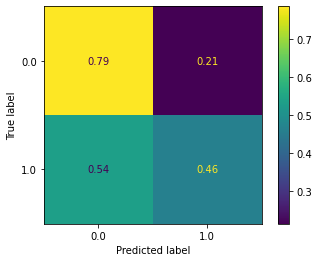

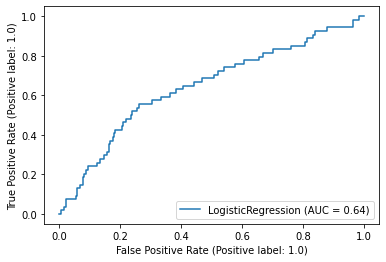

In [ ]:
metrics.plot_confusion_matrix(clf, X_test, y_test, normalize='true')
metrics.plot_roc_curve(clf, X_test, y_test)
plt.show()

In [ ]:
# initialize random forest classifier
clf1 = BalancedRandomForestClassifier(max_depth=30).fit(X_train, y_train)

In [ ]:
# perform k-fold cross-validation
accuracy_scores = cross_val_score(estimator = clf1, X= X_train, y= y_train, scoring='accuracy', cv= kfold)
print("K fold validation")
print("accuracy scores = {}, mean = {}, stdev = {}".format(accuracy_scores, np.mean(accuracy_scores), np.std(accuracy_scores)))

K fold validation
accuracy scores = [0.74755556 0.73754448 0.78647687 0.73576512 0.7588968 ], mean = 0.7532477659153816, stdev = 0.01855112865625203


Accuracy  = 0.7823613086770982
Precision for label 0 = 0.7855029585798816
Recall    for label 0 = 0.9851576994434137
Precision for label 1 = 0.7037037037037037
Recall    for label 1 = 0.11585365853658537


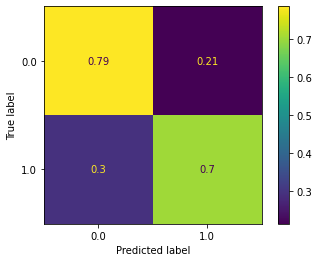

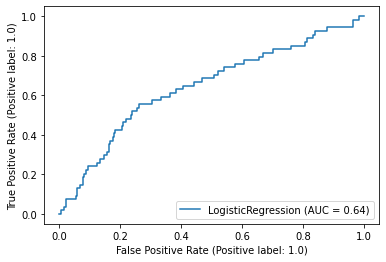

In [ ]:
# print metric scores and confusion matrix
predicted_labels = clf1.predict(X_test)
print('Accuracy  = {}'.format(metrics.accuracy_score(predicted_labels,  y_test)))
for label in [0, 1]:
  print('Precision for label {} = {}'.format(label, metrics.precision_score(predicted_labels, y_test, pos_label=label)))
  print('Recall    for label {} = {}'.format(label, metrics.recall_score(predicted_labels,    y_test, pos_label=label)))

metrics.plot_confusion_matrix(clf1, X_test, y_test, normalize='true')
metrics.plot_roc_curve(clf, X_test, y_test)
plt.show()

In [ ]:
# function to build a deep learning model
def build_model():
  model = Sequential()
  model.add(Dense(64, activation = 'relu'))
  model.add(Dropout(0.2))
  model.add(BatchNormalization())
  model.add(Dense(32, activation = 'relu'))
  model.add(Dropout(0.2))
  model.add(BatchNormalization())
  model.add(Dense(16, activation = 'relu'))
  model.add(Dropout(0.2))
  model.add(BatchNormalization())

  model.add(Dense(1, activation = 'sigmoid'))

  model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

  return model

In [ ]:
model = build_model()

In [ ]:
# train the model
model.fit(x = X_train, 
          y = y_train,
          batch_size = 32,
          epochs = 20)

Epoch 1/20
176/176 [==============================] - 4s 5ms/step - loss: 0.5949 - accuracy: 0.7737
Epoch 2/20
176/176 [==============================] - 1s 4ms/step - loss: 0.3196 - accuracy: 0.9212
Epoch 3/20
176/176 [==============================] - 1s 4ms/step - loss: 0.2181 - accuracy: 0.9468
Epoch 4/20
176/176 [==============================] - 1s 5ms/step - loss: 0.1807 - accuracy: 0.9555
Epoch 5/20
176/176 [==============================] - 1s 5ms/step - loss: 0.1677 - accuracy: 0.9573
Epoch 6/20
176/176 [==============================] - 1s 5ms/step - loss: 0.1628 - accuracy: 0.9584
Epoch 7/20
176/176 [==============================] - 1s 4ms/step - loss: 0.1596 - accuracy: 0.9587
Epoch 8/20
176/176 [==============================] - 1s 5ms/step - loss: 0.1565 - accuracy: 0.9596
Epoch 9/20
176/176 [==============================] - 1s 5ms/step - loss: 0.1558 - accuracy: 0.9596
Epoch 10/20
176/176 [==============================] - 1s 5ms/step - loss: 0.1625 - accuracy: 0.9591

In [ ]:
# get the structure of the model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                4032      
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_9 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dropout_10 (Dropout)        (None, 32)                0         
                                                                 
 batch_normalization_10 (Bat  (None, 32)               128       
 chNormalization)                                     

Accuracy  = 0.9608819345661451
Precision for label 0 = 0.9992603550295858
Recall    for label 0 = 0.9615658362989323
Precision for label 1 = 0.0
Recall    for label 1 = 0.0


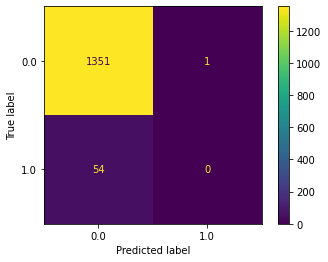

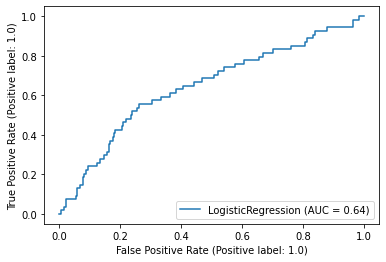

In [ ]:
# print metric scores and confusion matrix
predicted_labels = (model.predict(X_test) >= 0.5) * 1
print('Accuracy  = {}'.format(metrics.accuracy_score(predicted_labels,  y_test)))
for label in [0, 1]:
  print('Precision for label {} = {}'.format(label, metrics.precision_score(predicted_labels, y_test, pos_label=label)))
  print('Recall    for label {} = {}'.format(label, metrics.recall_score(predicted_labels,    y_test, pos_label=label)))

ConfusionMatrixDisplay.from_predictions(y_test, predicted_labels)
metrics.plot_roc_curve(clf, X_test, y_test)
plt.show()